In [14]:
using JLD2
using Plots

In [74]:
#JLD2.@load "../MC/american_S0_sigma_10_4.jld2" res
JLD2.@load "../MC/american_S0_sigma_10_4.jld2" res
res

2-element Vector{Matrix{Float64}}:
 [10.18140318198178 10.178936389681878 … 12.74442947837249 12.779882955917083; 9.901496071020663 9.92909701103452 … 12.540662115754245 12.58773095744823; … ; 0.34209558143091084 0.35841936287147835 … 2.350010649940577 2.380281538221442; 0.3276097212152814 0.34026566151151877 … 2.304559883249757 2.328302995802493]
 [0.08055583043719607 0.08119543684142302 … 0.17486095776150104 0.1758764392511303; 0.0810899644181712 0.08362160294945277 … 0.1732129476054784 0.1743555738236753; … ; 0.026371419032937514 0.027196749304681127 … 0.09965600835816621 0.10058951594425894; 0.025558260233184034 0.026307977430554668 … 0.0983295058705615 0.09913445812366188]

In [16]:
price_matrix = res[1]

100×100 Matrix{Float64}:
 10.1814    10.1789    10.197     10.2047    …  12.7097   12.7444   12.7799
  9.9015     9.9291     9.94359    9.94837      12.534    12.5407   12.5877
  9.65191    9.65153    9.66361    9.67929      12.3577   12.379    12.4201
  9.38849    9.40264    9.44707    9.50137      12.1775   12.2036   12.2382
  9.1888     9.22539    9.24168    9.26495      11.9877   12.024    12.0507
  8.95919    8.99425    9.01905    9.05782   …  11.8383   11.8753   11.9168
  8.75806    8.77948    8.80682    8.83191      11.6799   11.712    11.7379
  8.53975    8.57107    8.58581    8.60759      11.499    11.5386   11.5719
  8.3124     8.34653    8.3581     8.3911       11.3329   11.3751   11.4071
  8.09719    8.1248     8.16614    8.19475      11.1576   11.1903   11.2145
  ⋮                                          ⋱                      
  0.474909   0.492383   0.505163   0.525473      2.69236   2.7226    2.74541
  0.451888   0.467767   0.480299   0.500513      2.63387   2.65788   

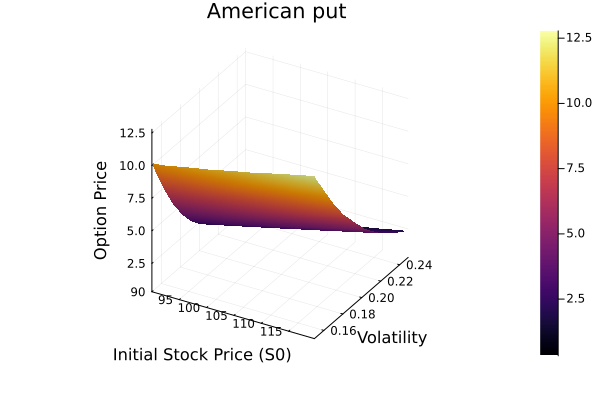

In [17]:
implied_vol_values = range(0.15, stop=0.25, length=101)[1:end-1]
S0_values = range(90, stop=120, length=101)[1:end-1]
# 3Dサーフェスプロット 
surface(S0_values, implied_vol_values, price_matrix, xlabel="Initial Stock Price (S0)", ylabel="Volatility", 
        zlabel="Option Price", title="American put ")

In [18]:
@show S0_values[50]
@show S0_values[51]

S0_values[50] = 104.7
S0_values[51] = 105.0


105.0

In [19]:
price_matrix;

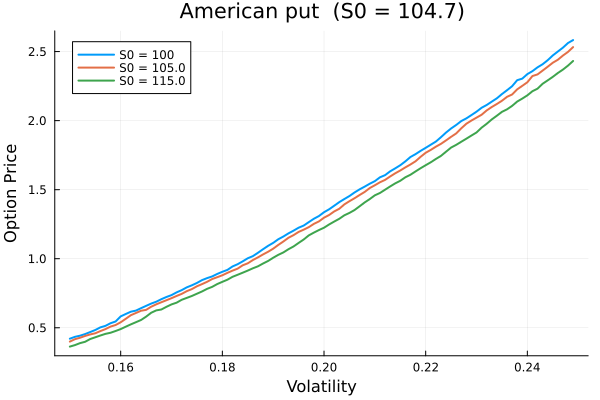

In [20]:
plot(implied_vol_values, price_matrix[95, :], xlabel="Volatility", ylabel="Option Price", 
     title="American put  (S0 = 104.7)", label="S0 = 100", lw=2)

plot!(implied_vol_values, price_matrix[96, :], label="S0 = 105.0", lw=2)

plot!(implied_vol_values, price_matrix[98, :], label="S0 = 115.0", lw=2)

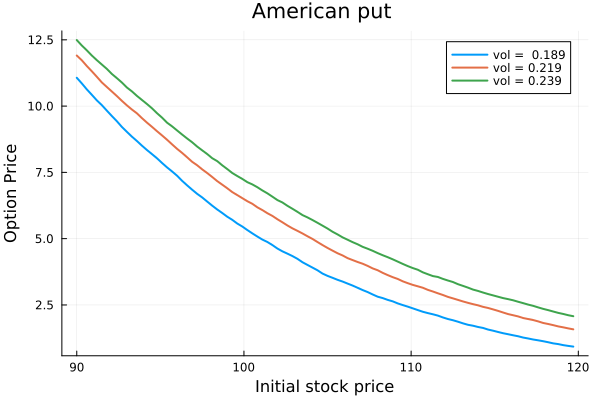

In [21]:
plot(S0_values, price_matrix[:, 40], xlabel="Initial stock price", ylabel="Option Price", 
     title="American put ", label="vol =  0.189", lw=2)
plot!(S0_values, price_matrix[:, 70], label="vol = 0.219", lw=2)
plot!(S0_values, price_matrix[:, 90], label="vol = 0.239", lw=2)

In [22]:
using LinearAlgebra
U, S, Vt = svd(price_matrix)

function svd_with_tolerance(matrix, tolerance, maxbonddim=1000)
    factorization = svd(matrix)
   trunci = min(replacenothing(findlast(>(tolerance), factorization.S / maximum(factorization.S)), 1), maxbonddim)
   return factorization.U[:, 1:trunci], Diagonal(factorization.S[1:trunci]) * factorization.Vt[1:trunci, :]
end

function replacenothing(value::Union{T, Nothing}, default::T)::T where {T}
    if isnothing(value)
        return default
    else
        return value
    end
end

replacenothing (generic function with 1 method)

In [64]:
U, SVt = svd_with_tolerance(price_matrix, 1e-4)
@show size(U)
@show size(SVt)

size(U) = (100, 31)
size(SVt) = (31, 100)


(31, 100)

In [65]:
U_core = reshape(U, 1, size(U)[1], size(U)[2])
SVt_core = reshape(SVt, size(SVt)[1], size(SVt)[2], 1)

tt = [U_core, SVt_core]

2-element Vector{Array{Float64, 3}}:
 [-0.1994959359812497 -0.19589837996719964 … -0.023038889831612848 -0.02244797887706493;;; -0.1975589554318633 -0.18647795702910996 … 0.10106768778059073 0.09991135636845754;;; -0.16584957280509366 -0.13231972676920778 … -0.19509662758133692 -0.1955438203109992;;; … ;;; -0.07794545644928881 0.12867935523570004 … 0.08905704250613336 -0.1427874387625853;;; -0.06751262267672008 0.08418519924732462 … 0.11133319680966891 -0.02019370988476383;;; 0.10651006194902532 0.04448485085358669 … 0.05409776502333304 -0.1478113138157197]
 [-43.182248825584175 -43.42827414133045 … -70.16223344583189 -70.45496309167422; -7.273673689163819 -7.147202911697991 … 6.548017370726128 6.700326374591288; … ; -0.004700903336761332 0.008915895003602493 … -0.0015152580286914674 -0.0009019512343049484; 0.0038858056667236116 0.00012054465159507053 … -0.0028179153186563017 0.0053169008698158784;;;]

In [66]:
maximum(price_matrix)

12.779882955917083

In [67]:
@show maximum(abs.(price_matrix .- U * SVt))

maximum(abs.(price_matrix .- U * SVt)) = 0.009780129374604485


0.009780129374604485

In [68]:
@show size(tt[1])
@show size(tt[2])

size(tt[1]) = (1, 100, 31)
size(tt[2]) = (31, 100, 1)


(31, 100, 1)

In [69]:
indexset = [1, 2]
function tt_evaluate(tt::Vector{Array{V,3}}, indexset) where {V}
    only(prod(T[:, i, :] for (T, i) in zip(tt, indexset)))
end

res1_2 = tt_evaluate(tt, indexset)

10.18061605666829

In [70]:
@time tt_evaluate(tt, indexset)

  0.000010 seconds (7 allocations: 736 bytes)


10.18061605666829

In [71]:
abs(price_matrix[1, 2] - res1_2)

0.0016796669864120872

In [72]:
indexset = [100, 90]
res100_100 = tt_evaluate(tt, indexset)
abs(price_matrix[100, 90] - res100_100)

0.003188451578699958